In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Load and review Data

In [2]:
vehicledf=pd.read_csv("../Unsupervised_project_py/vehicle-1.csv")

In [3]:
vehicledf.head(20)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107          NaN                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0           NaN   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   
15                  65.0                        9          204.0   
16                  52.0                        6          118.0   
17                  69.0                        6          177.0   
18                  61.0                       10          216.0   
19                   NaN                       10          208.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   
12           43.0                    19.0                        148   
13           44.0                    19.0                        144   
14           37.0                    21.0                        1

In [4]:
vehicledf.shape

(846, 19)

In [5]:
vehicledf.dtypes 
# Class is the categorical variable that needs to be label encoded
# 18 other variables are numeric independant variables
# Missing data values are marked NaN values.

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
lbl = LabelEncoder() 
columns = vehicledf.columns
#Let's Label Encode our class variable: 
print(columns)
vehicledf['class'] = lbl.fit_transform(vehicledf['class']) 

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


# EDA

# Dealing with missing values

In [45]:
#count the null values  NaN values in the columns
vehicledf.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Insights:
- circularity, hollow_ratio,max.length_rectangularity, , max.length_aspect_ratio, compactness,class has no missing values rest all features are having some kind of missing values 
- All attributes are of numerical type

In [12]:
from sklearn.impute import SimpleImputer

newdf = vehicledf.copy()

X = newdf.iloc[:,0:19] #separting all numercial independent attribute
#y = vehdf.iloc[:,18] #seprarting class attribute. 
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
newdf = pd.DataFrame(transformed_values, columns = column )
newdf.head(20)


compactness  circularity  distance_circularity  radius_ratio  \
0          95.0         48.0                  83.0         178.0   
1          91.0         41.0                  84.0         141.0   
2         104.0         50.0                 106.0         209.0   
3          93.0         41.0                  82.0         159.0   
4          85.0         44.0                  70.0         205.0   
5         107.0         44.0                 106.0         172.0   
6          97.0         43.0                  73.0         173.0   
7          90.0         43.0                  66.0         157.0   
8          86.0         34.0                  62.0         140.0   
9          93.0         44.0                  98.0         167.0   
10         86.0         36.0                  70.0         143.0   
11         90.0         34.0                  66.0         136.0   
12         88.0         46.0                  74.0         171.0   
13         89.0         42.0                  85.0         144.0   
14         94.0         49.0                  79.0         203.0   
15         96.0         55.0                 103.0         201.0   
16         89.0         36.0                  51.0         109.0   
17         99.0         41.0                  77.0         197.0   
18        104.0         54.0                 100.0         186.0   
19        101.0         56.0                 100.0         215.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                     10.0          162.0   
1                   57.0                      9.0          149.0   
2                   66.0                     10.0          207.0   
3                   63.0                      9.0          144.0   
4                  103.0                     52.0          149.0   
5                   50.0                      6.0          255.0   
6                   65.0                      6.0          153.0   
7                   65.0                      9.0          137.0   
8                   61.0                      7.0          122.0   
9                   62.0                     11.0          183.0   
10                  61.0                      9.0          133.0   
11                  55.0                      6.0          123.0   
12                  68.0                      6.0          152.0   
13                  58.0                     10.0          152.0   
14                  71.0                      5.0          174.0   
15                  65.0                      9.0          204.0   
16                  52.0                      6.0          118.0   
17                  69.0                      6.0          177.0   
18                  61.0                     10.0          216.0   
19                  61.0                     10.0          208.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                      159.0   
1            45.0                    19.0                      143.0   
2            32.0                    23.0                      158.0   
3            46.0                    19.0                      143.0   
4            45.0                    19.0                      144.0   
5            26.0                    28.0                      169.0   
6            42.0                    19.0                      143.0   
7            48.0                    18.0                      146.0   
8            54.0                    17.0                      127.0   
9            36.0                    22.0                      146.0   
10           50.0                    18.0                      130.0   
11           54.0                    17.0                      118.0   
12           43.0                    19.0                      148.0   
13           44.0                    19.0                      144.0   
14           37.0                    21.0                      154

In [13]:
newdf.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean         188.918440     195.632388    0.977541  
std            6.152247       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

In [14]:
newdf.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [ ]:
#As we can see there are no null values now we have already replced them with mean values

# Univariate distribution plot

In [15]:
newdf.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

In [ ]:
#Compactness has mean and median value similar that means it is normally distributed and has no skew/outliers
#Circularity: this also has same mean and median , seems to be normally distributed
#scatter_ratio: mean is higher than median so it is postive skewed
#scaled_variance and scaled_variance.1: mean is higher than median so they are positive/right skewed
#hollows_ratio: mean is less than median so it's little negative/left skewed and has outliers

# Univariate distribution plot

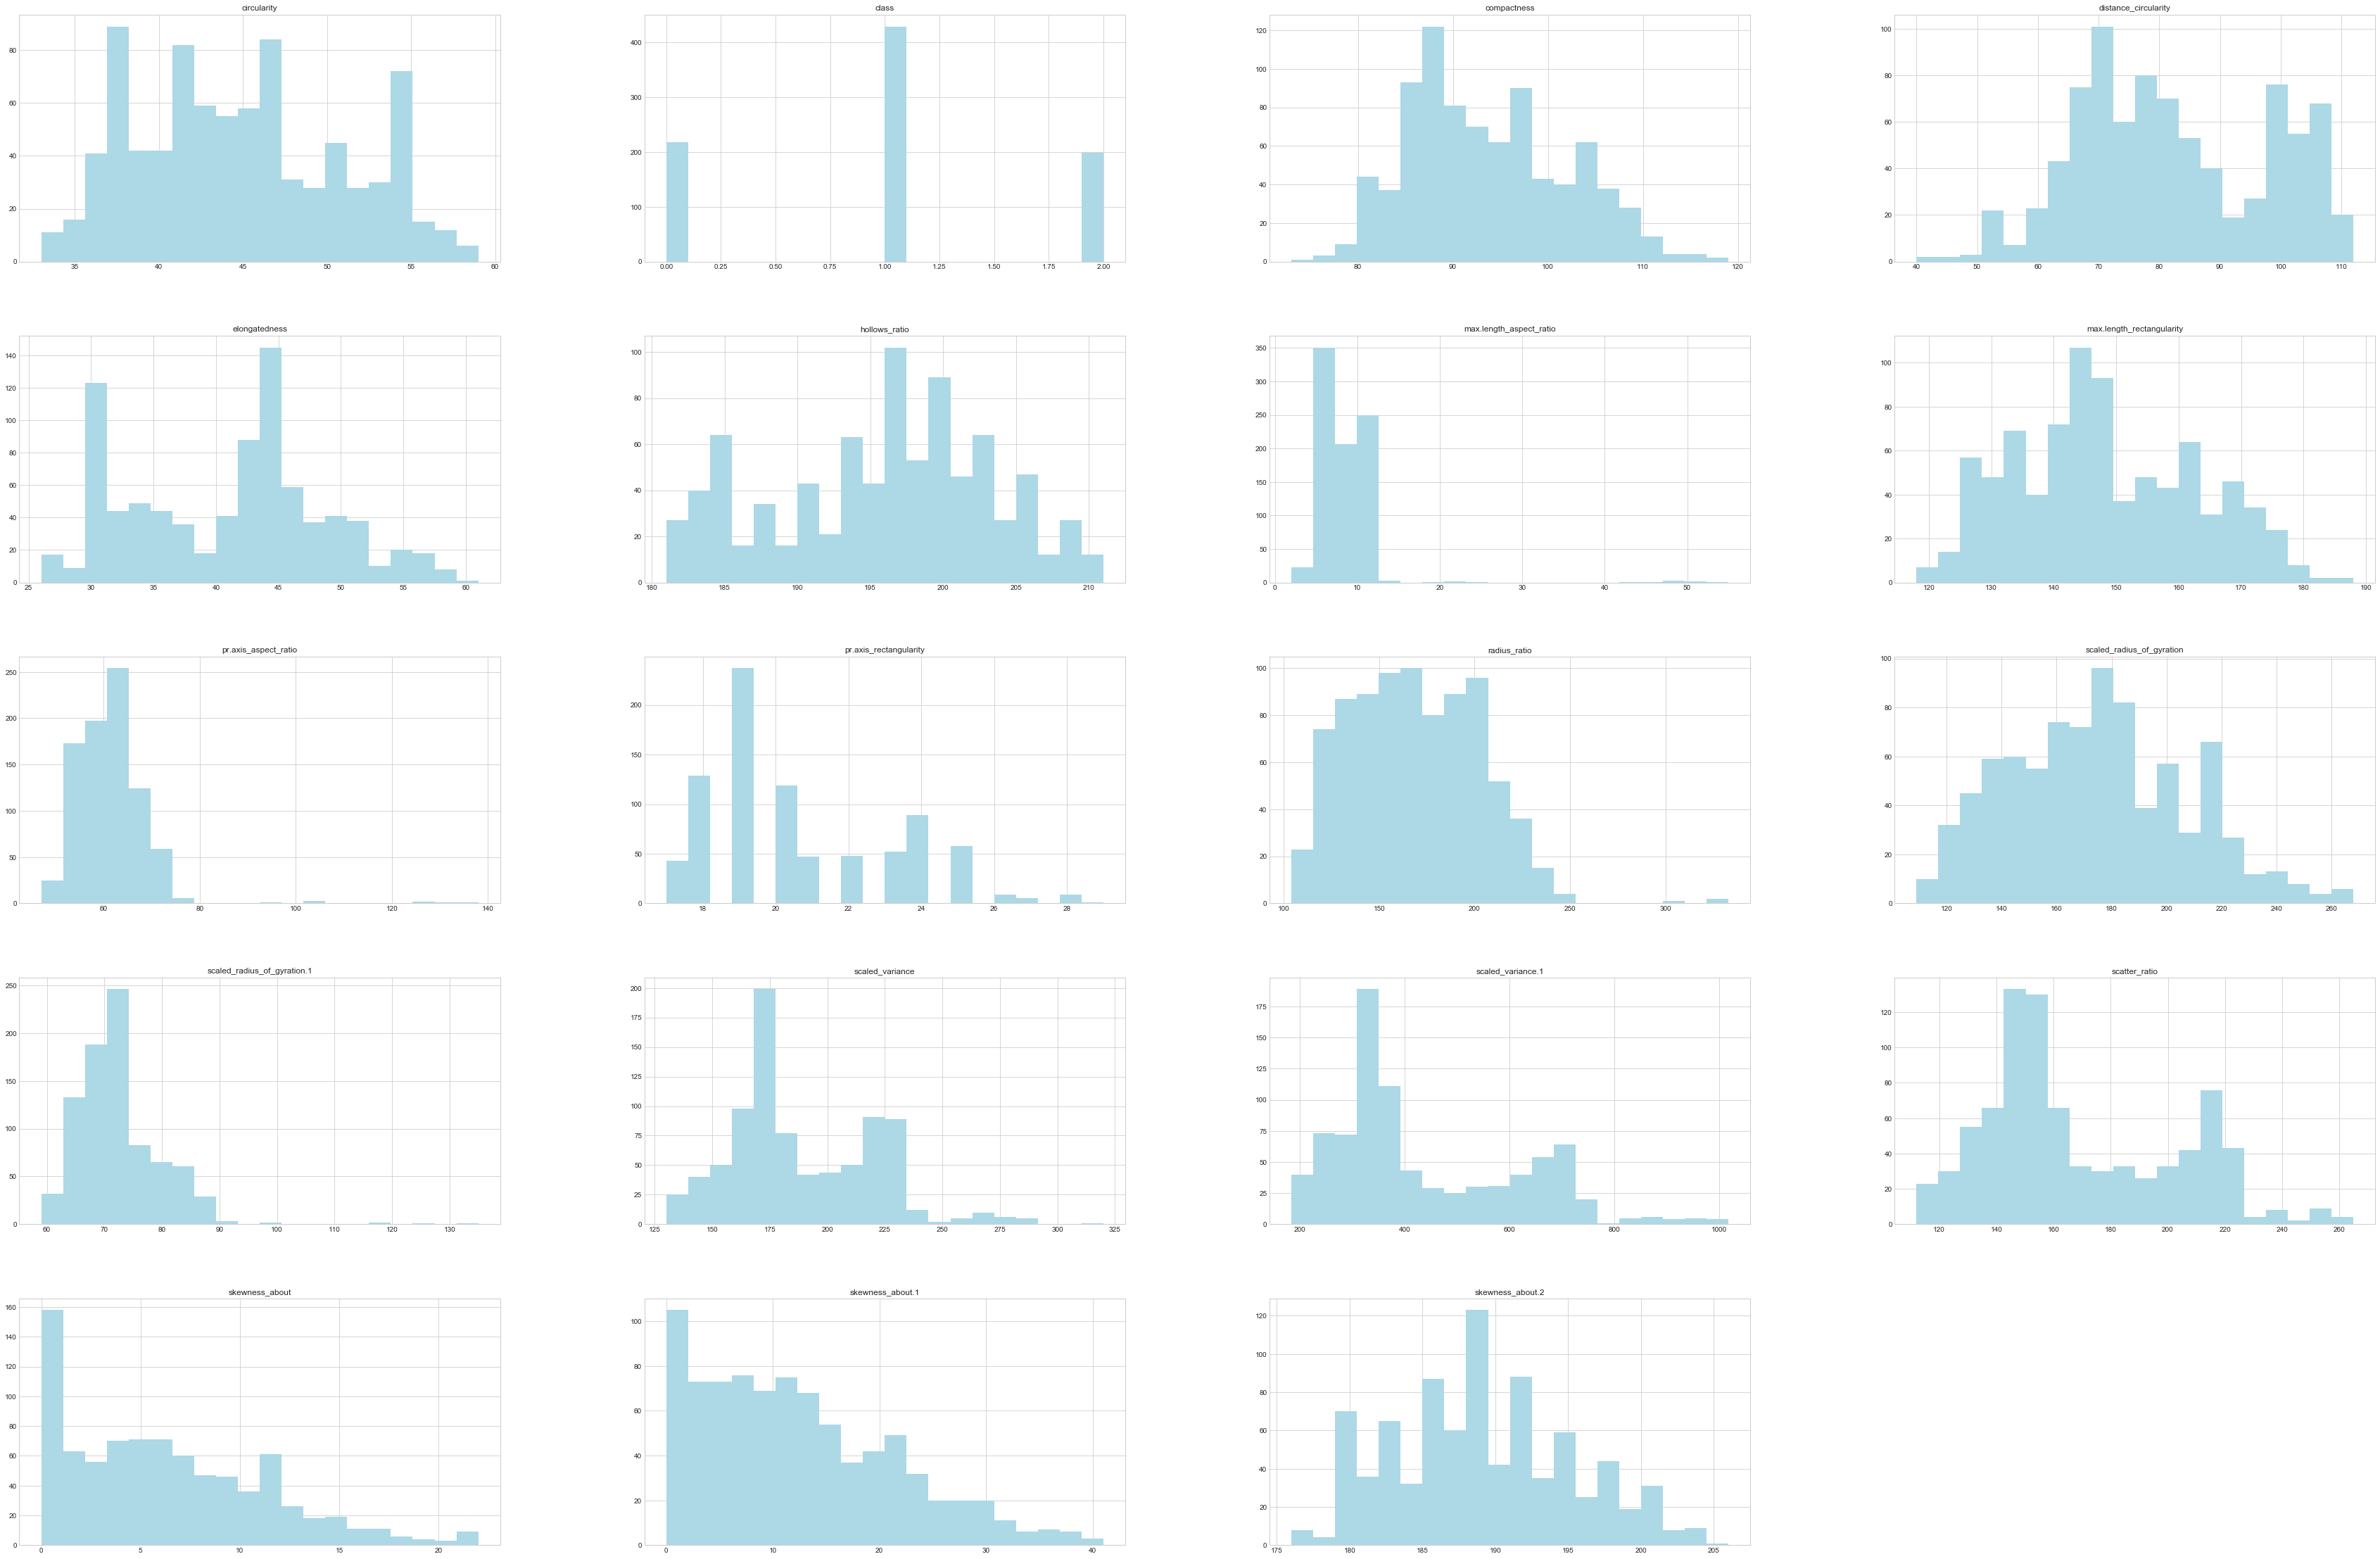

In [24]:
newdf.hist(bins=20,figsize=(60,40),color='lightblue')
plt.show()

In [25]:
#Most of the data attributes are normally distributed
#Circularity seems to have multiple peaks and almost normally disctributed
#hollow_ratio is left skewed as stated earlier
#scaled valriance,scaled valriance 1 and skewness about 1 and 2, scatter_ratio are right skewed
#pr.axis_rectangularity seems to be have outliers as there are some gaps found in the bar plot.

In [26]:
newdf.skew()

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64

In [27]:
#Some of them are right skewed while only hollow ratio is left skewed

# Box plot to check the outliers in independent numerical variables

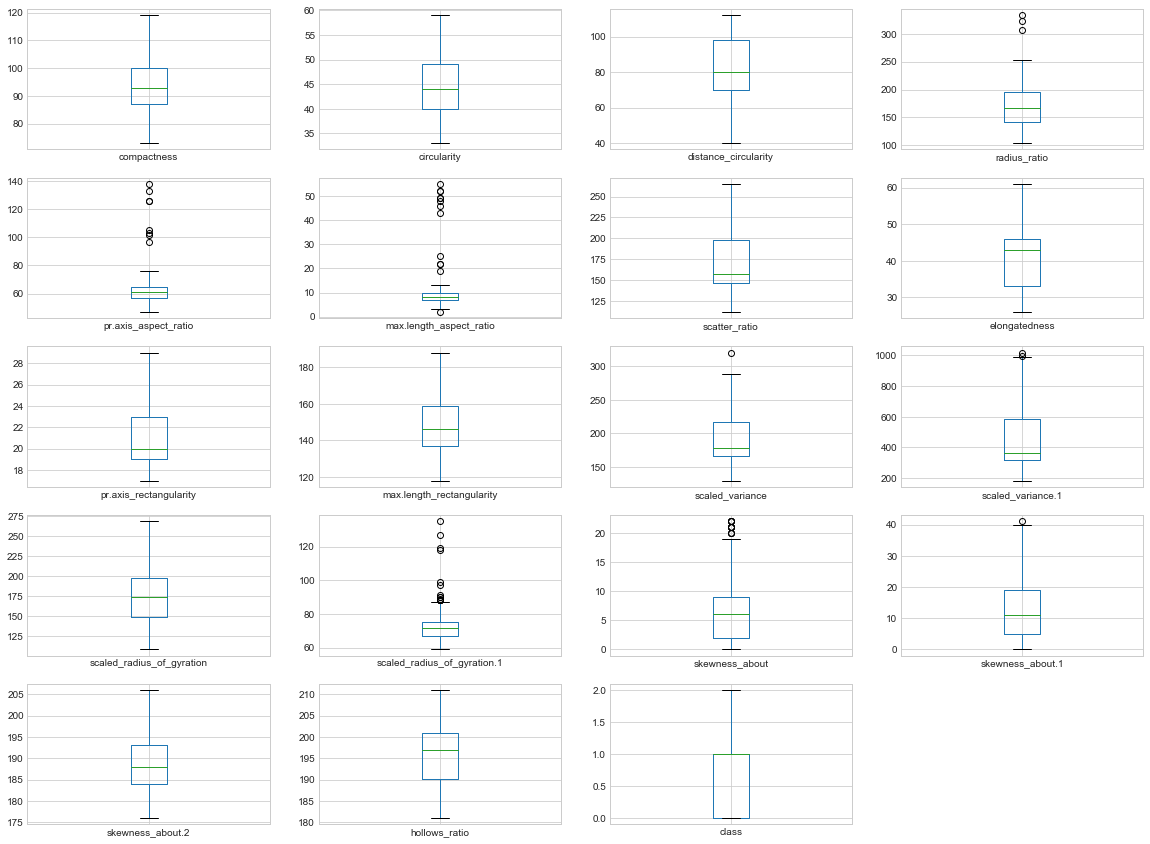

In [29]:
newdf.plot(kind= 'box' , subplots=True,layout=(5,4), sharex=False, sharey=False, figsize=(20,15))
plt.show()

In [31]:
#Insights:
#radius_ratio,pr.axis_aspect_ratio, skewness_about, max_length_aspect_ratio,scaled_radius_of_gyration.1, scaled_variance.1,  skewness_about, skewness_about_1, scaled_variance.1 are with outliers. 
#skewness_about.1 and scaled_variance have only one outlier

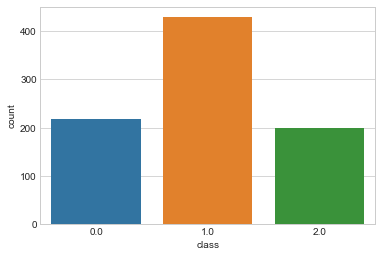

In [32]:
#To view the distribution of categorical variable, draw a countplot
sns.countplot(newdf['class'],label='Count')

In [ ]:
#Maximum no of vehicles are identified as Car

# Find relationship between different attributes (Independent variables) 

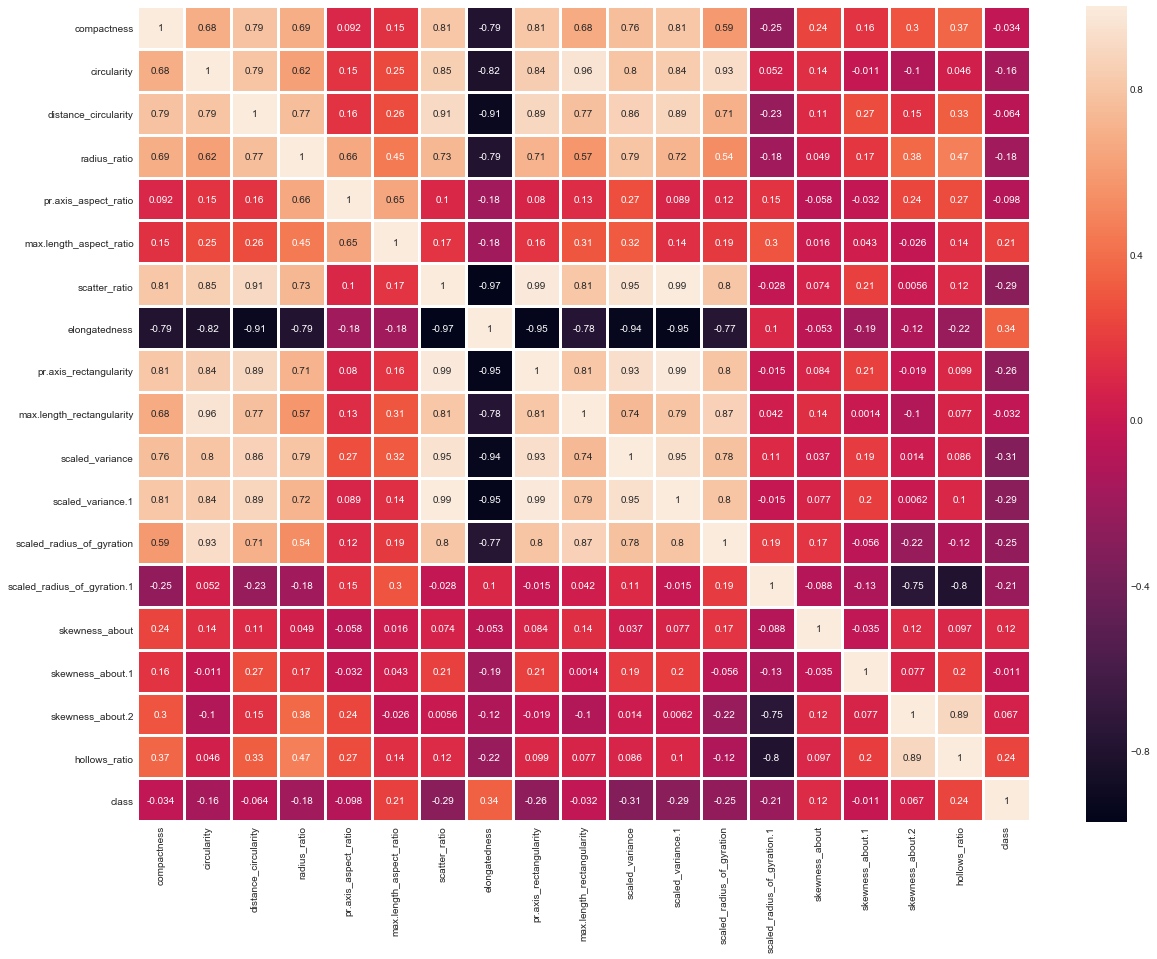

In [37]:
newdf1=newdf.drop('class',axis=1)  #dropping the class attribute
corr=newdf.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True,linewidths=2)

Insights:
Strong correlation:
      - Scaled variance.1  seems to be highly correlated with value of 0.99 with pr.axis_recatngularity and scatter_ratio
      - pr.axis_recatngularity & scatter_ratio seems to be strongly correlated with value of 0.99
      - Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.95
      - skewness_about_2 and hollow_ratio seems to be strongly correlated, corr coeff: 0.89
      - ditance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.81
      - compactness & circularity , radius_ratio & pr.axis_aspect_ratio also seems ver averagely correlated with coeff: 0.67.
      - scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated with corr coeff: 0.79
      - pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with coeff: 0.81 
      - scatter_ratio and elongatedness seems to be have strong negative correlation val : -0.97
      - elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  -0.95 

Weak or no correlation:
      - skewness_about and scatter_ration are not correlated
      - scaled variance and max_length_aspect_ratio have very less correlation(0.32)
      - max_length_aspect_ratio & radius_ratio have average correlation with coeff: 0.45
      - pr.axis_aspect_ratio & max_length_aspect_ratio seems to have very little correlation(0.16)
      - scaled_radius_gyration & scaled_radisu_gyration.1 seems to be very little correlated
      - scaled_radius_gyration.1 & skewness_about seems to be very little correlated
      - skewness_about & skewness_about.1 not be correlated
      - skewness_about.1 and skewness_about.2 are not correlated.
            

# Pair plot anlysis

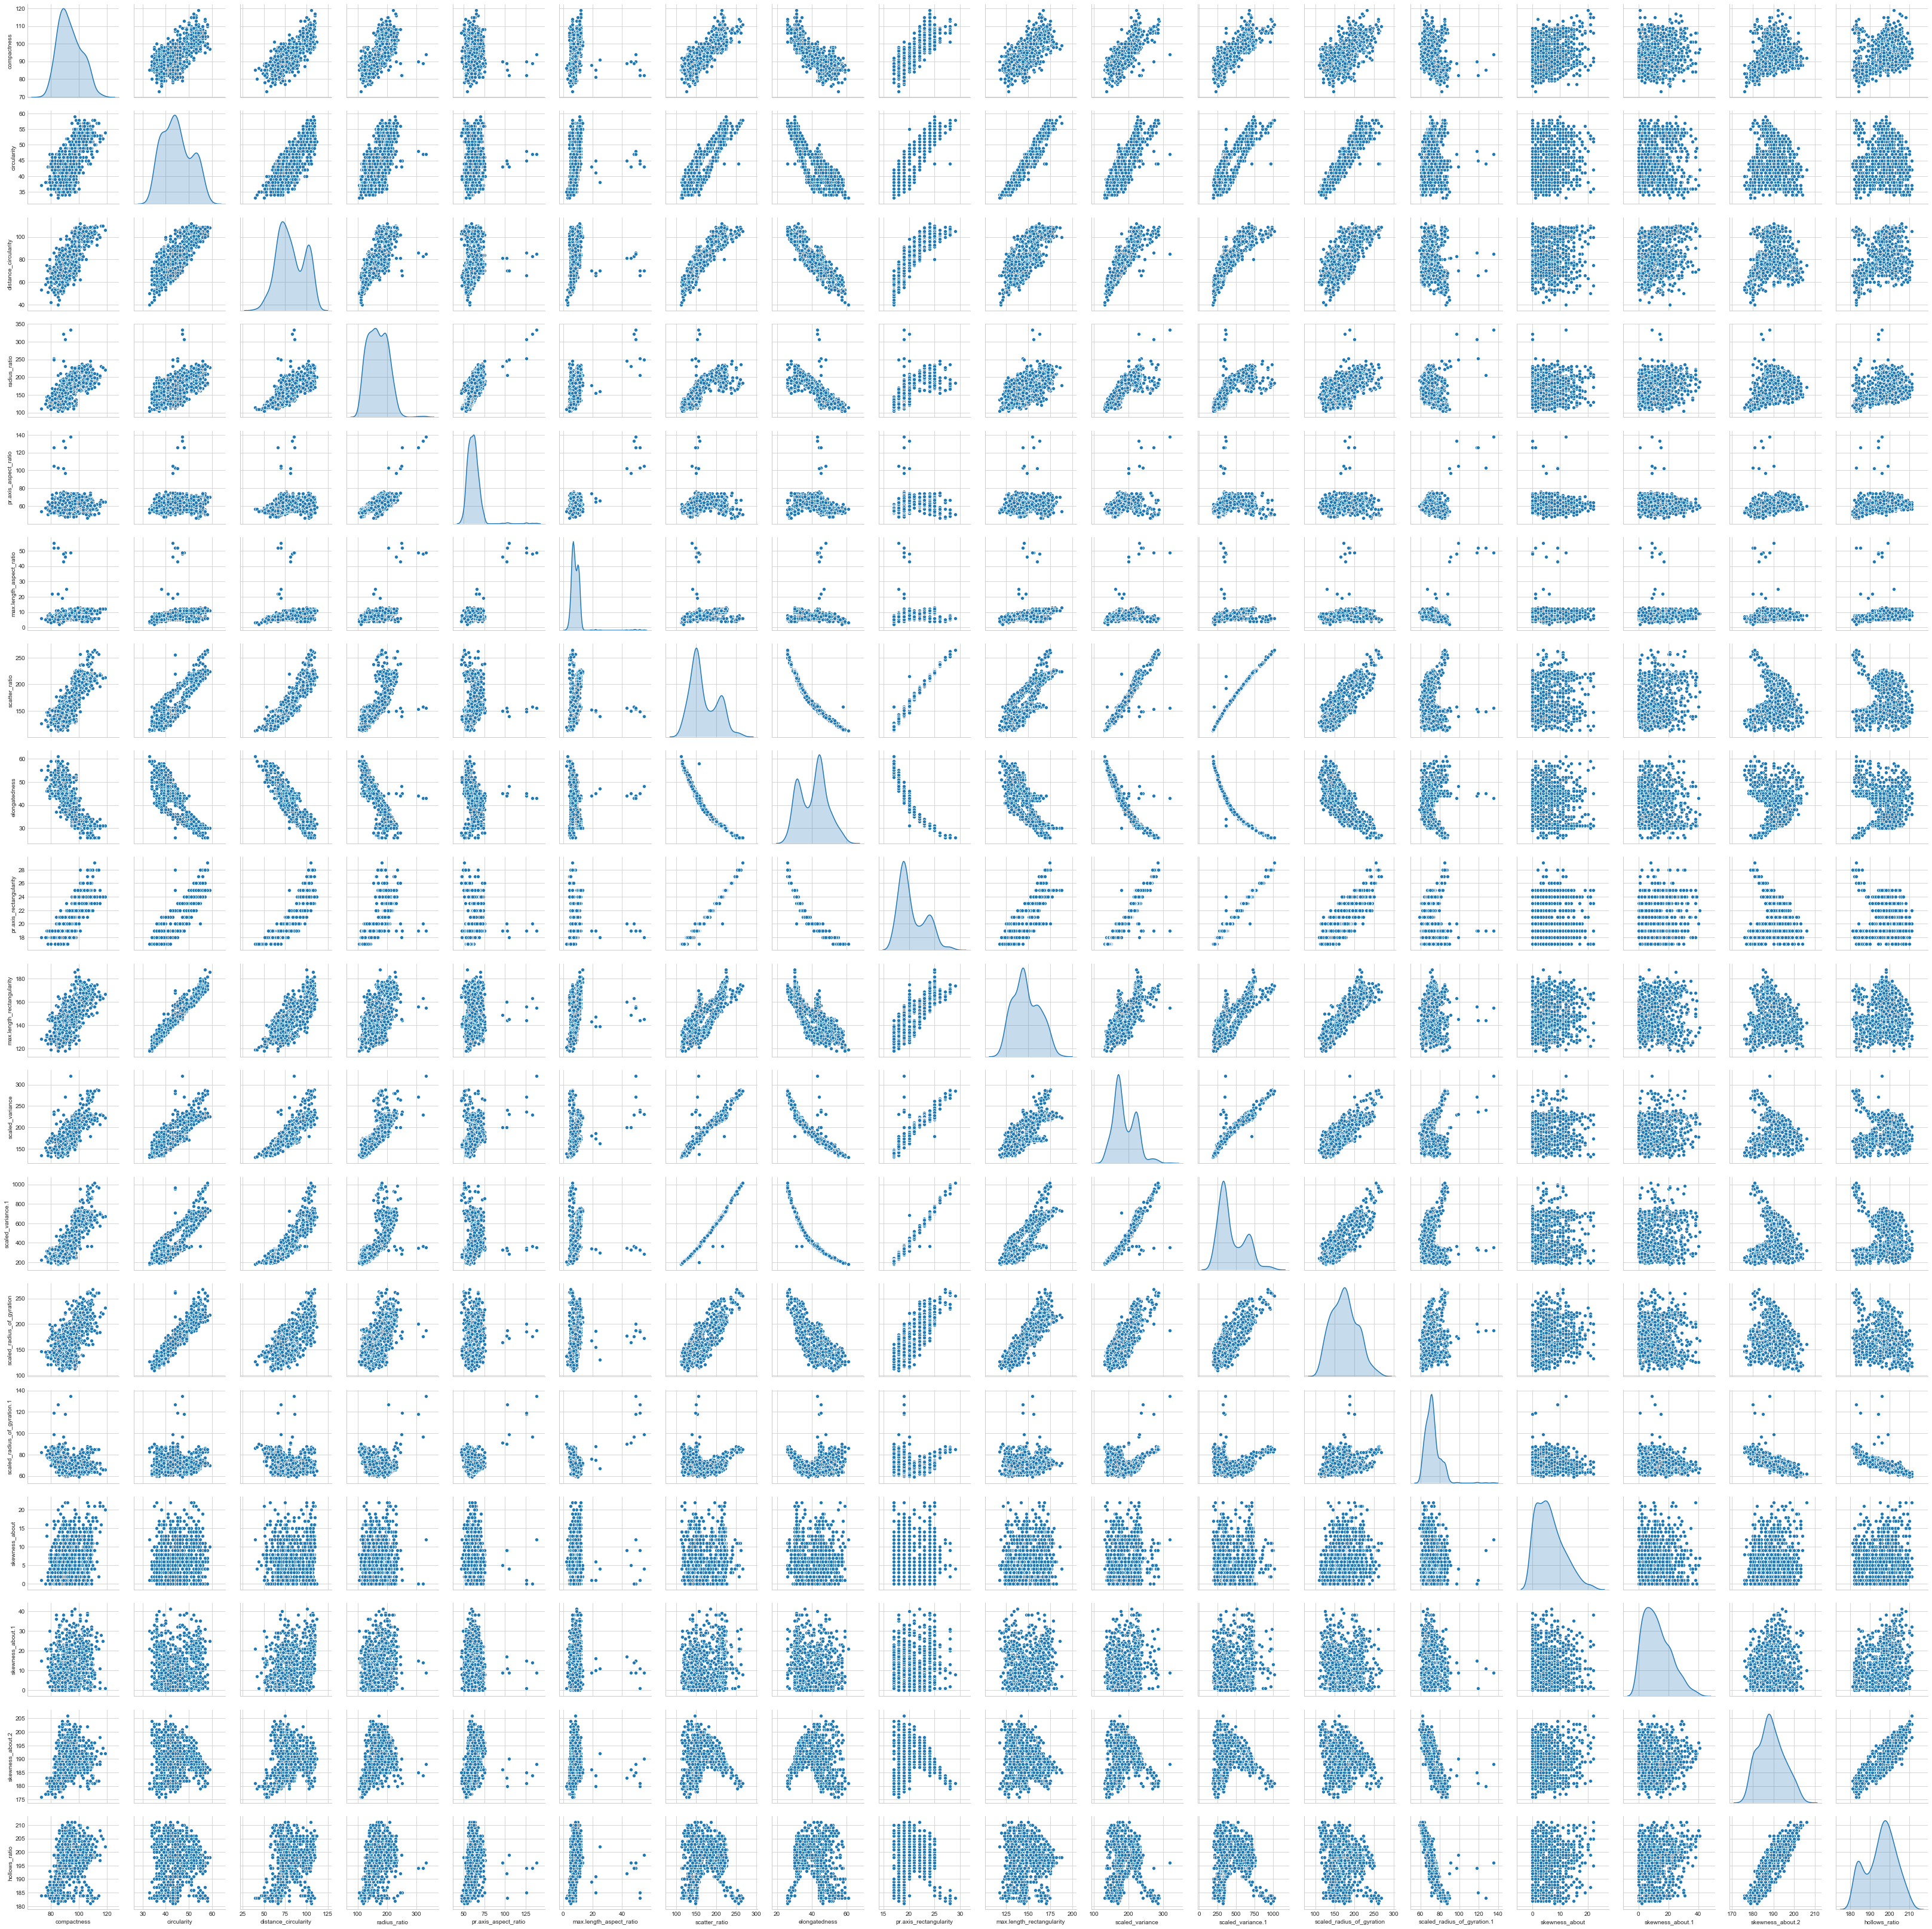

In [38]:
sns.pairplot(newdf1, diag_kind="kde")

In [ ]:
#Insights:
#Maximum we can see three clusters here
#most of the attributes have linear relationship
#Scaled Variance & Scaled Variance.1  have strong linear relationship
#pr.axis_recatngularity and Scaled Variance.1/Scaled Variance  have strong linear relationship
#skewness_about_2 and hollow_ratio also seems to have strong positive correation or linear relationship
#scatter_ratio and elongatedness have inverse linear relationship
#elongatedness and pr.axis_rectangularity seems to have strong inverse linear relationship

# choose the attributes those have to be a part of the analysis

From above correlation matrix we can see that there are many features which are highly correlated then there is no point of using  both the highly correlated features
in that case we can drop one feature to avoid multicollinearity to happens.
So we will find all the features which having more than 0.9 correlation.as we can decide to get rid of those columns 
whose correlation is +-0.9 or above.Following are the columns:

max.length_rectangularity
scaled_radius_of_gyration
skewness_about.2
scatter_ratio
elongatedness
pr.axis_rectangularity
scaled_variance
scaled_variance.1

Conclusion:we have more than 50% of highly correlated attributes so we need to deal with this problem of Multicollinearity 
1. One way is by eliminating one of the perfectly correlated features. 
2. Other one is by using the dimension reduction algorithm such as Principle Component Analysis (PCA) 

# Split Data into train and test 

In [39]:
#now separate the dataframe into dependent and independent variables

X =  newdf.drop('class',axis=1)
y =  newdf['class']

In [40]:
from sklearn.preprocessing import StandardScaler
#We transform (centralize) the entire X (independent variable data) to normalize it using standardscalar through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)  

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.30,random_state=1)

# Principal Component Analysis(PCA)

In [49]:
#Covariance matrix
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  

In [50]:
#Calculate Eigen Vectors & Eigen Values
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [51]:
#Sort eigenvalues in descending order
eig_pairs=[(eigenvalues[index],eigenvectors[:,index]) for index in range(len(eigenvalues))]
# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# print out sorted eigenvalues
print('Eigen values in descending order: \n%s' %eigvalues_sorted)

Eigen values in descending order: 
[9.404602609088712, 3.0149220585246312, 1.9035250218389657, 1.1799374684450206, 0.9172606328594378, 0.5399926288001129, 0.35887011792939744, 0.22193245599893402, 0.16060859663511767, 0.09185722339516159, 0.06649941176460192, 0.04660059944187703, 0.03579471891303863, 0.02741206573719489, 0.020579287070888228, 0.01791663143223666, 0.010025789847556175, 0.0029644574250446325]


In [52]:
tot = sum(eigenvalues)  #total sum of eigen values
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18th entry 

# Plotting The Explained Variance and Princiapl Components:

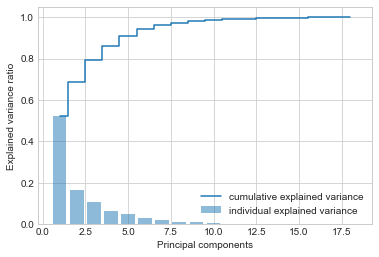

In [53]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [ ]:
#From the above plot we can clearly observe that 8 dimensions are able to explain almost 95% variance of data 
#so we will use first 8 principal components going forward and calulate the reduced dimensions.

# Dimensionality Reduction

In [54]:
#from the above analysis, we can see that 8 dimensions can explain almost 95% of variance in the original data
#Here we will anlysis our data for reduced mathmatical space with 8 dimesions
#Reduce columns from 18 to 8 dimesions
d_reduce=np.array(eigvectors_sorted[0:8])
#projecting original data into principal component dimensions
X_std_8D=np.dot(X_std,d_reduce.T)
reduced_pca=pd.DataFrame(X_std_8D)  #converting array to dataframe
reduced_pca

0         1          2         3         4         5         6  \
0    0.334162  0.219026  -1.001584 -0.176612 -0.079301 -0.757447 -0.901124   
1   -1.591711  0.420603   0.369034 -0.233234 -0.693949 -0.517162  0.378637   
2    3.769324 -0.195283  -0.087859 -1.202212 -0.731732  0.705041 -0.034584   
3   -1.738598  2.829692  -0.109456 -0.376685  0.362897 -0.484431  0.470753   
4    0.558103 -4.758422 -11.703647 -0.147464 -3.256953 -0.203446  2.671578   
..        ...       ...        ...       ...       ...       ...       ...   
841 -0.442648  0.605884  -0.197213  1.444958 -1.065425  0.820179 -0.041563   
842 -0.314956 -0.164511  -0.794573  0.908272  0.235492 -1.438257 -0.599113   
843  4.809174  0.001249  -0.532333 -0.295652  1.344236 -0.217070  0.573249   
844 -3.294092  1.008276   0.357003  1.933675 -0.042768 -0.402491 -0.202406   
845 -4.765053 -0.334900   0.568136  1.224807  0.054051 -0.335637  0.058098   

            7  
0    0.381106  
1   -0.247059  
2   -0.482772  
3    0.023086  
4    0.448854  
..        ...  
841 -0.506991  
842  0.153086  
843 -0.110478  
844 -0.320622  
845  0.248035  

[846 rows x 8 columns]

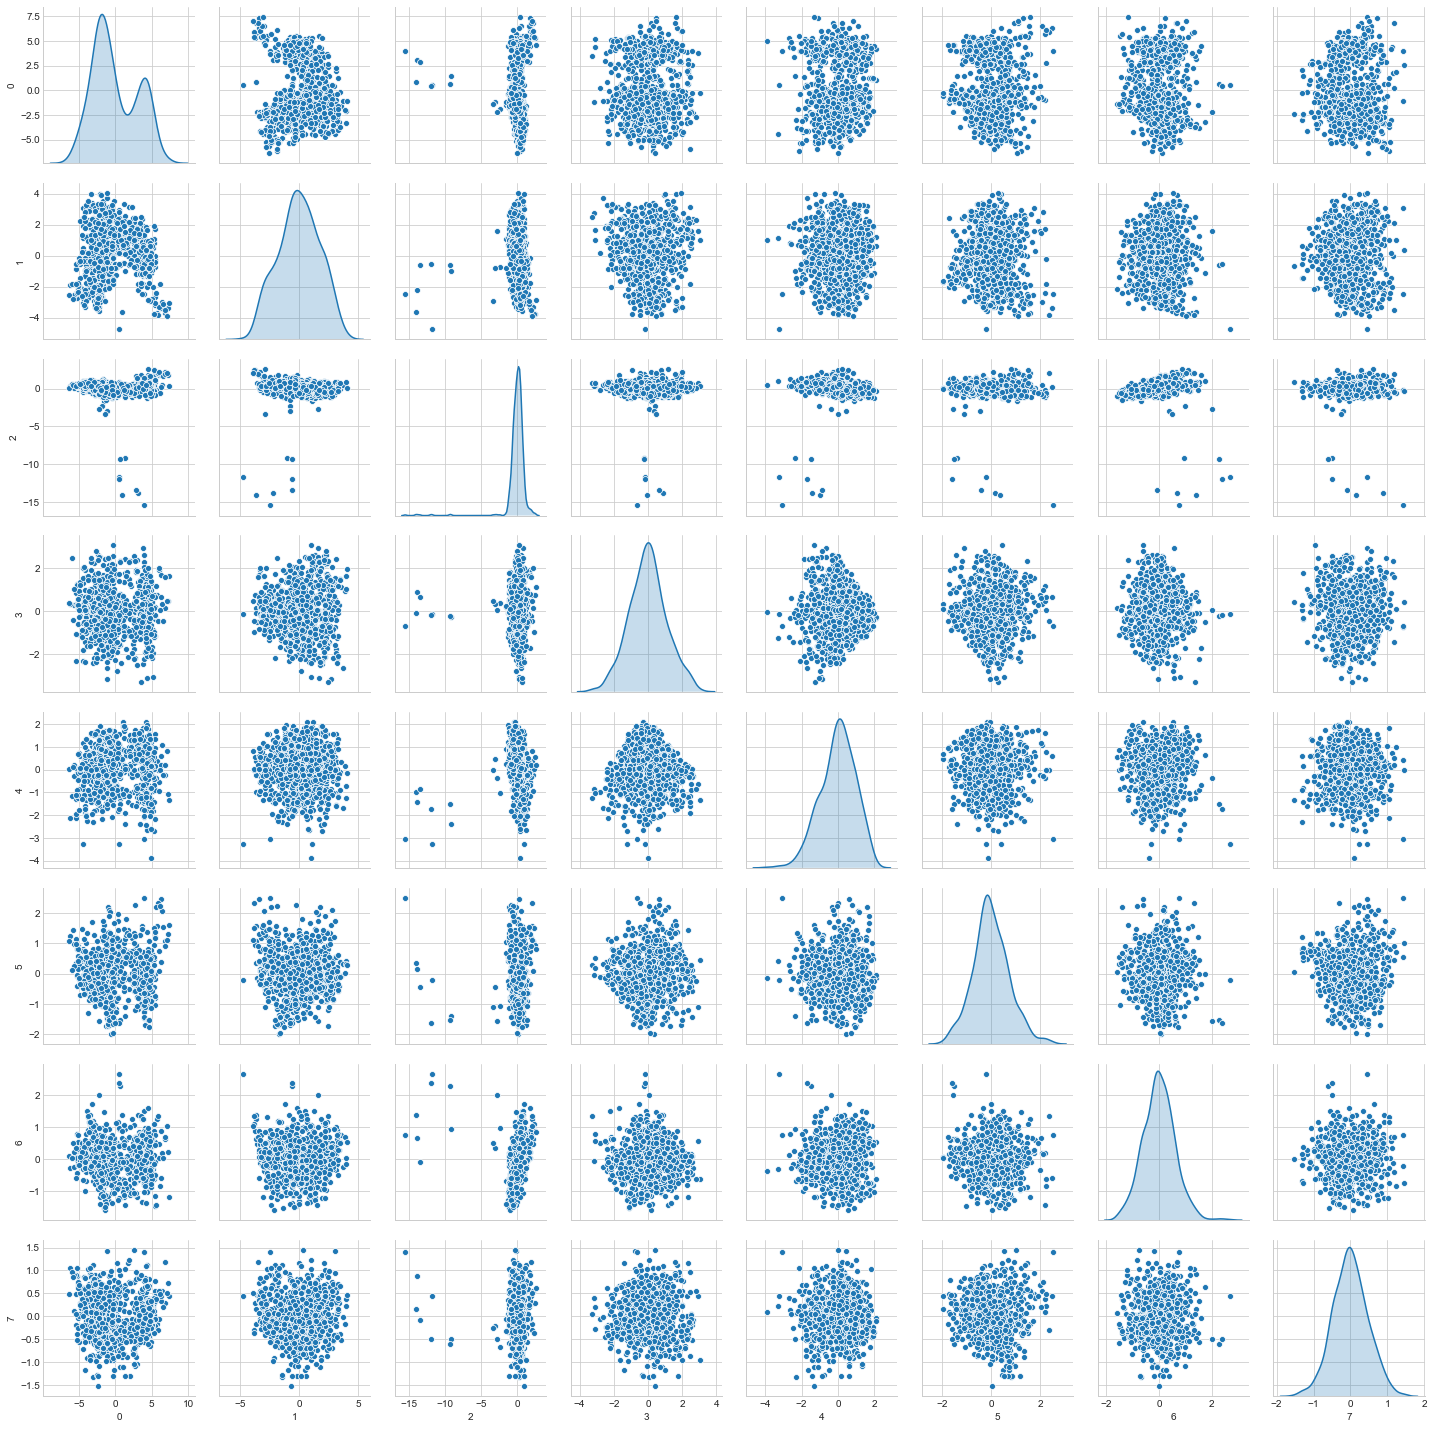

In [55]:
sns.pairplot(reduced_pca, diag_kind='kde') 

In [ ]:
#As we can see from the above pair plot that applying thed dimesion reduction using PCA, our attributes has become independant with no correlation
#as most of attributes have cloud of data points instead of no linear relationship

# SVC Model on the train-test data

In [56]:
#PCA Data with 8 dimesions
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)

# Train the model with Original and PCA data with new dimension
#Fitting SVC Model on original data

In [57]:
svc=SVC()
svc.fit(X_train,y_train) #fit svc model on  original training data

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
y_predict=svc.predict(X_test)  #predict y values for test data

# Fitting SVC Model on PCA data

In [60]:
svc1=SVC()
svc1.fit(pca_X_train,pca_y_train) #fit svc model on PCA training data
pca_y_predict=svc1.predict(pca_X_test)

In [64]:
#display accuracy scores for both models
print("Model score on Original data",svc.score(X_test,y_test))
print("Model score on reduced PCA dimesion",svc1.score(pca_X_test,pca_y_test))

print("Accuracy before PCA on original 18 dimesions", accuracy_score(y_test,y_predict))
print("Accuracy after PCA on reduced 8 dimesions", accuracy_score(pca_y_test,pca_y_predict))

Model score on Original data 0.952755905511811
Model score on reduced PCA dimesion 0.937007874015748
Accuracy before PCA on original 18 dimesions 0.952755905511811
Accuracy after PCA on reduced 8 dimesions 0.937007874015748


In [65]:
#Insights:
    #On testing data with support vector classifier without performaing PCA we are getting accuracy of 95%
    #But when we applied SVC classifier on the PCA components then accuracy scored to 93%
    #from 18 dimesions to reduced 8 dimesions, our model has scored well in terms of accuracy

# Confusion Matrix

In [70]:
# Calculate Confusion Matrix & PLot To Visualize it
def draw_confmatrix(y_test, y_predict, str1, str2, str3, datatype ):
    #Make predictions and evalute
    cm = confusion_matrix( y_test, y_predict, [0,1,2] )
    print("Confusion Matrix For :", "\n",datatype,cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion Matrix For : 
 Original Data Set [[ 58   0   1]
 [  1 129   3]
 [  6   1  55]]


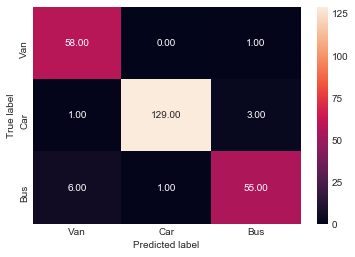

In [71]:
#Confusion matrix for original data
draw_confmatrix(y_test,y_predict,"Van","Car","Bus","Original Data Set")

In [ ]:
#Our model has correctly classified 58 van out of 59 actual vans and has only one error in preicting it as bus
#For 133 actual cars, our model has correctly predicted 129 cars whereas only 4 predicted wrong
#Out of 62 actual bus, model has predicted 56 bus correctly while only 1 bus classifed wrong as Car and 6 bus to van

Confusion Matrix For : 
 For Reduced Dimensions Using PCA  [[ 57   1   1]
 [  2 126   5]
 [  5   2  55]]


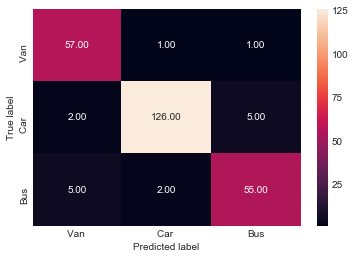

In [72]:
draw_confmatrix(pca_y_test, pca_y_predict,"Van ", "Car ", "Bus", "For Reduced Dimensions Using PCA ")

In [ ]:
#With PCA/reduced dimesion, Our model has correctly classified 57 van out of 59 actual vans and has only two classified wrong as one car and one bus 
#For 133 actual cars, our model has correctly predicted 126 cars whereas it predicted wrong 5 cars to bus amd 2 cars to van
#Out of 62 actual bus, model has predicted 56 bus correctly while it wrongly classified 2 bus to Car and 5 bus to van

# Classification report metrics

In [73]:
#original data
print("Classification Report For Raw Data:", "\n", classification_report(y_test,y_predict))

Classification Report For Raw Data: 
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.94        59
         1.0       0.99      0.97      0.98       133
         2.0       0.93      0.89      0.91        62

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254



In [ ]:
#Our model has best precision and recall score of 99% and 97% to classify the car from given set of shilhoutte parameters.
#It has 98% recall(best) and lowest precision 89% when to classify the van , while lowest recall of 89% and  93% recall for bus
#Weighted avg is coming 95% for all classification metrics
#Accuracy is 95%

In [74]:
#Model built on Principal Components:
print("Classification Report For PCA:","\n", classification_report(pca_y_test,pca_y_predict))

Classification Report For PCA: 
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        59
         1.0       0.98      0.95      0.96       133
         2.0       0.90      0.89      0.89        62

    accuracy                           0.94       254
   macro avg       0.92      0.93      0.93       254
weighted avg       0.94      0.94      0.94       254



In [ ]:
#Classification metrics on reduced dimesions after PCA:
#Our model has best precision score of 98% and recall of 95% to classify the car from given set of shilhoutte parameters.
#It has 97% recall(best) and lowest precision 89% when to classify the van , while lowest recall of 89% and 90% recall for bus
#Weighted avg is coming 94% for all classification metrics
#Accuracy is 94%

# Grid searcha and K-fold cross validation to tune our model

In [79]:
def hypertune_classifier(name,model,param_grid,x_train,y_train,x_test,y_test,CV):
    CV_rf = GridSearchCV(estimator=model, param_grid=param_grid, cv=CV, verbose= 1, n_jobs =-1 )
    CV_rf.fit(x_train, y_train)
    
    y_pred_train = CV_rf.predict(x_train)
    y_pred_test = CV_rf.predict(x_test)
    
    print('Best Score: ', CV_rf.best_score_)
    print('Best Params: ', CV_rf.best_params_)
    
    #Classification Report
    print(name+" Classification Report: ")
    print(classification_report(y_test, y_pred_test))
    
   
    #Confusion Matrix for test data
    draw_confmatrix(y_test, y_pred_test,"Van", "Car", "Bus", "Original Data Set" )
    print("SVM Accuracy Score:",round(accuracy_score(y_test, y_pred_test),2)*100)

In [77]:
#Training on SVM Classifier
from sklearn.model_selection import GridSearchCV
svmc = SVC()

#Let's See What all parameters one can tweak 
print("SVM Parameters:", svmc.get_params())

# Create the parameter grid based on the results of random search 
param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1],  'kernel': ['rbf']},
 ]

param_grid_1 = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

SVM Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


# Hypertuning SVM using hyper Parameters:

# For PCA

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s


Best Score:  0.9442090395480225
Best Params:  {'C': 1, 'kernel': 'rbf'}
Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        59
         1.0       0.98      0.95      0.96       133
         2.0       0.90      0.89      0.89        62

    accuracy                           0.94       254
   macro avg       0.92      0.93      0.93       254
weighted avg       0.94      0.94      0.94       254

Confusion Matrix For : 
 Original Data Set [[ 57   1   1]
 [  2 126   5]
 [  5   2  55]]


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished


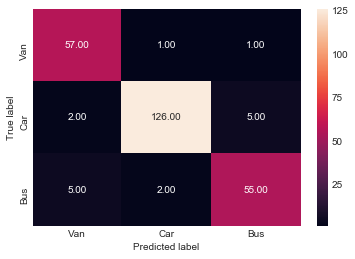

SVM Accuracy Score: 94.0


In [80]:
#With first set of parameters :Iteration 1
hypertune_classifier ("Support Vector Classifier",svmc,param_grid,pca_X_train,pca_y_train,pca_X_test,pca_y_test,10) 

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.5s


Best Score:  0.9341525423728815
Best Params:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        59
         1.0       0.98      0.95      0.97       133
         2.0       0.94      0.94      0.94        62

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254

Confusion Matrix For : 
 Original Data Set [[ 56   1   2]
 [  4 127   2]
 [  2   2  58]]


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.4s finished


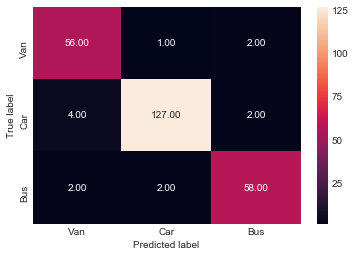

SVM Accuracy Score: 95.0


In [81]:
#With second set of parameters :Iteration 2
hypertune_classifier ("Support Vector Classifier",svmc,param_grid_1,pca_X_train,pca_y_train,pca_X_test,pca_y_test,10) 

Insights:
    
    -Here we tune the important hyperparameters of the model which are not model parameter to improve the model performance like we play with C value and type of kernal where
        C: Inverse of regularization strength- smaller values of C specify stronger regularization.
        Kernal type: rbf or linear
    -GridSearchCV get's the best hyperparamters from the array of parameters specified and evaluates each model to find the best model and score for us.
    - After the grid search hyper tuning of SVM model we got the best score from Iteration 2
    Best Score: 0.9341525423728815 : 
    Best Params: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'} 
    Accruacy Score : 95 % which increased from 94% to 95% with best params (c:1000,kernal:rbf)
    -precision has jumped from 90% to 94% to classify the bus
    -recall has jumped from 89% to 94% to classify the bus

# For Original data:

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.4s finished


Best Score:  0.9611016949152542
Best Params:  {'C': 1, 'kernel': 'rbf'}
Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94        59
         1.0       0.99      0.97      0.98       133
         2.0       0.93      0.89      0.91        62

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254

Confusion Matrix For : 
 Original Data Set [[ 58   0   1]
 [  1 129   3]
 [  6   1  55]]


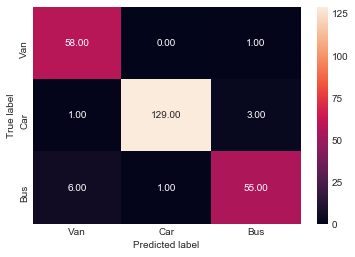

SVM Accuracy Score: 95.0


In [82]:
#With first set of parameters :Iteration 1
hypertune_classifier ("Support Vector Classifier",svmc,param_grid,X_train,y_train,X_test,y_test,10) 

Best Score:  0.9611016949152542
Best Params:  {'C': 1, 'kernel': 'rbf'}

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  97 out of 120 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.4s finished


Best Score:  0.9662429378531072
Best Params:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Support Vector Classifier-iteration2 Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        59
         1.0       0.97      0.98      0.97       133
         2.0       0.97      0.94      0.95        62

    accuracy                           0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254

Confusion Matrix For : 
 Original Data Set [[ 57   1   1]
 [  2 130   1]
 [  1   3  58]]


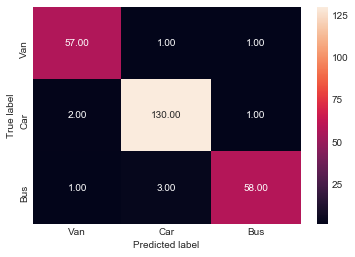

SVM Accuracy Score: 96.0


In [83]:
#With second set of parameters :Iteration 2
hypertune_classifier ("Support Vector Classifier-iteration2",svmc,param_grid_1,X_train,y_train,X_test,y_test,10) 

Insights:
    
    -Here we tune the important hyperparameters of the model which are not model parameter to improve the model performance like we play with C value and type of kernal where
        C: Inverse of regularization strength- smaller values of C specify stronger regularization.
        Kernal type: rbf or linear
    -GridSearchCV get's the best hyperparamters from the array of parameters specified and evaluates each model to find the best model and score for us.
    - After the grid search hyper tuning of SVM model we got the best score from Iteration 2
    Best Score: 0.9662429378531072 : 
    Best Params: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'} 
    Accruacy Score : 96 % which increased from 95% to 96% with best params (c:1000,kernal:rbf)
    -precision has jumped from 93% to 97% to classify the bus
    -recall has jumped from 89% to 94% to classify the bus
    -precision has jumped from 89% to 95% to classify the Van while reduced from 99% to 97% to classify the Car

# Conclusion:

In [ ]:
#We can see a slight improvement in model accuracy:95%
#We analysed that how prinicpal components helped us to pick only the relevant dimesions that covers the major information by 
#analysing the relationship between independant attributes
#Also apply scaling or normalise your data to perform better
#Fine tune the model using the hyperparameters tuning techniques which tunes the model performances and also employs Cross-fold validation internally to make sure our model is ready to face production environment. 
# Also we saw that we are able to achieve the accuracy of 95% with only 8 attributes instead of 18 so we can say that PCA is great tool to make model perform better